## Exploratory Analysis for Jewelry_Type = 'Rings'

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")



In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Rings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,1104.000000,1104.000000,1104.000000,1104.000000,580.000000,28.000000,3.000000,2.0,1.0
mean,2912.287591,4591.213768,1.966014,1.803931,0.395328,0.413571,0.023333,0.0,0.0
std,3415.502234,5131.953538,2.245148,2.233570,0.512195,1.103809,0.040415,0.0,NaN
min,157.500000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1396.500000,2195.000000,0.650000,0.550000,0.130000,0.000000,0.000000,0.0,0.0
50%,2215.000000,3495.000000,1.360000,1.140000,0.270000,0.045000,0.000000,0.0,0.0
75%,3297.500000,5500.000000,2.372500,2.100000,0.470000,0.160000,0.035000,0.0,0.0
max,56350.000000,80500.000000,23.360000,21.160000,4.990000,5.000000,0.070000,0.0,0.0


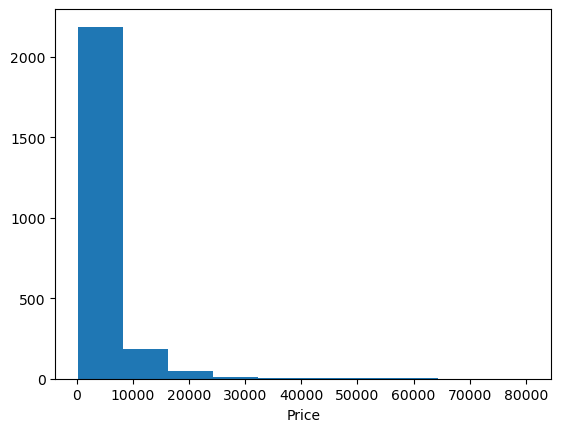

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

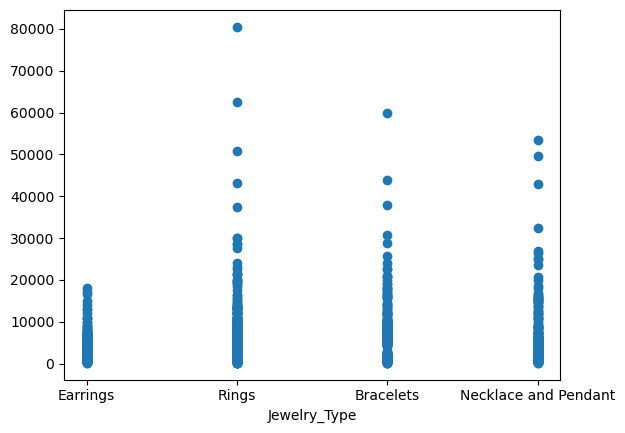

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_rings = df[df['Jewelry_Type']=='Rings']

In [9]:
df_rings = df_rings.drop(columns=['Stone5_Desc',
       'Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
       'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color',
       'Stone6_Cut'])

In [10]:
df_rings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 413 to 1516
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     1104 non-null   object 
 1   Discount_Price  1104 non-null   float64
 2   Price           1104 non-null   float64
 3   Metal           1104 non-null   object 
 4   Metal Color     1104 non-null   object 
 5   Stones          1104 non-null   object 
 6   Jewelry_Type    1104 non-null   object 
 7   Product_Carat   1104 non-null   float64
 8   Stone1_Desc     1104 non-null   object 
 9   Stone1_Carat    1104 non-null   float64
 10  Stone1_Stone    1104 non-null   object 
 11  Stone1_Color    1104 non-null   object 
 12  Stone1_Cut      1104 non-null   object 
 13  Stone2_Desc     580 non-null    object 
 14  Stone2_Carat    580 non-null    float64
 15  Stone2_Stone    580 non-null    object 
 16  Stone2_Color    580 non-null    object 
 17  Stone2_Cut      580 non-null   

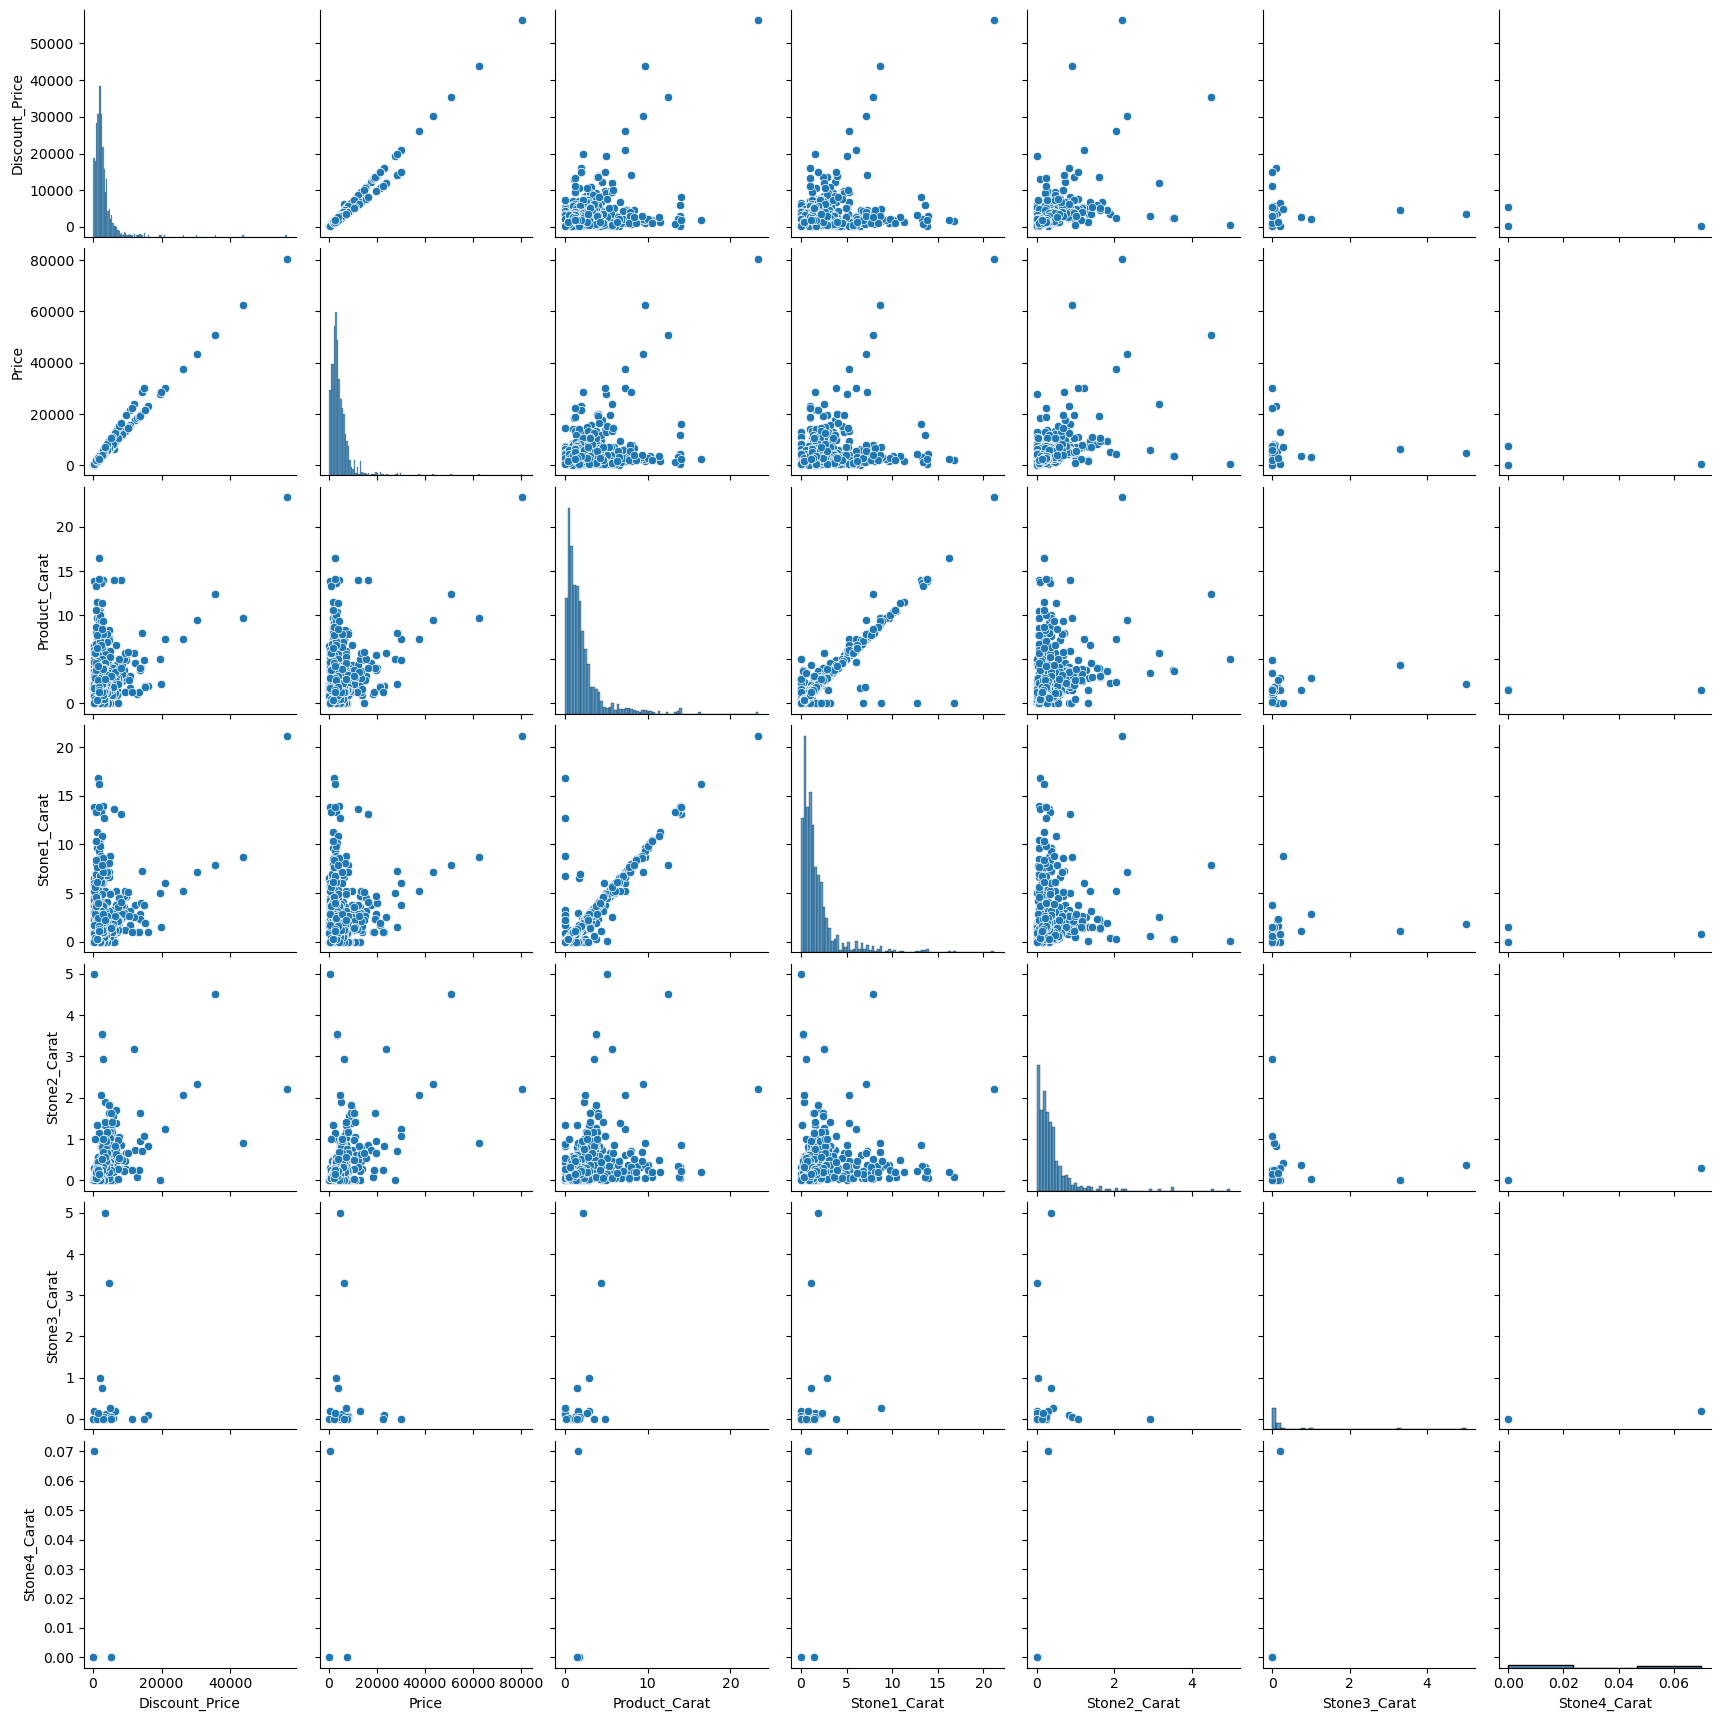

In [11]:
sns.pairplot(df_rings)
plt.show()

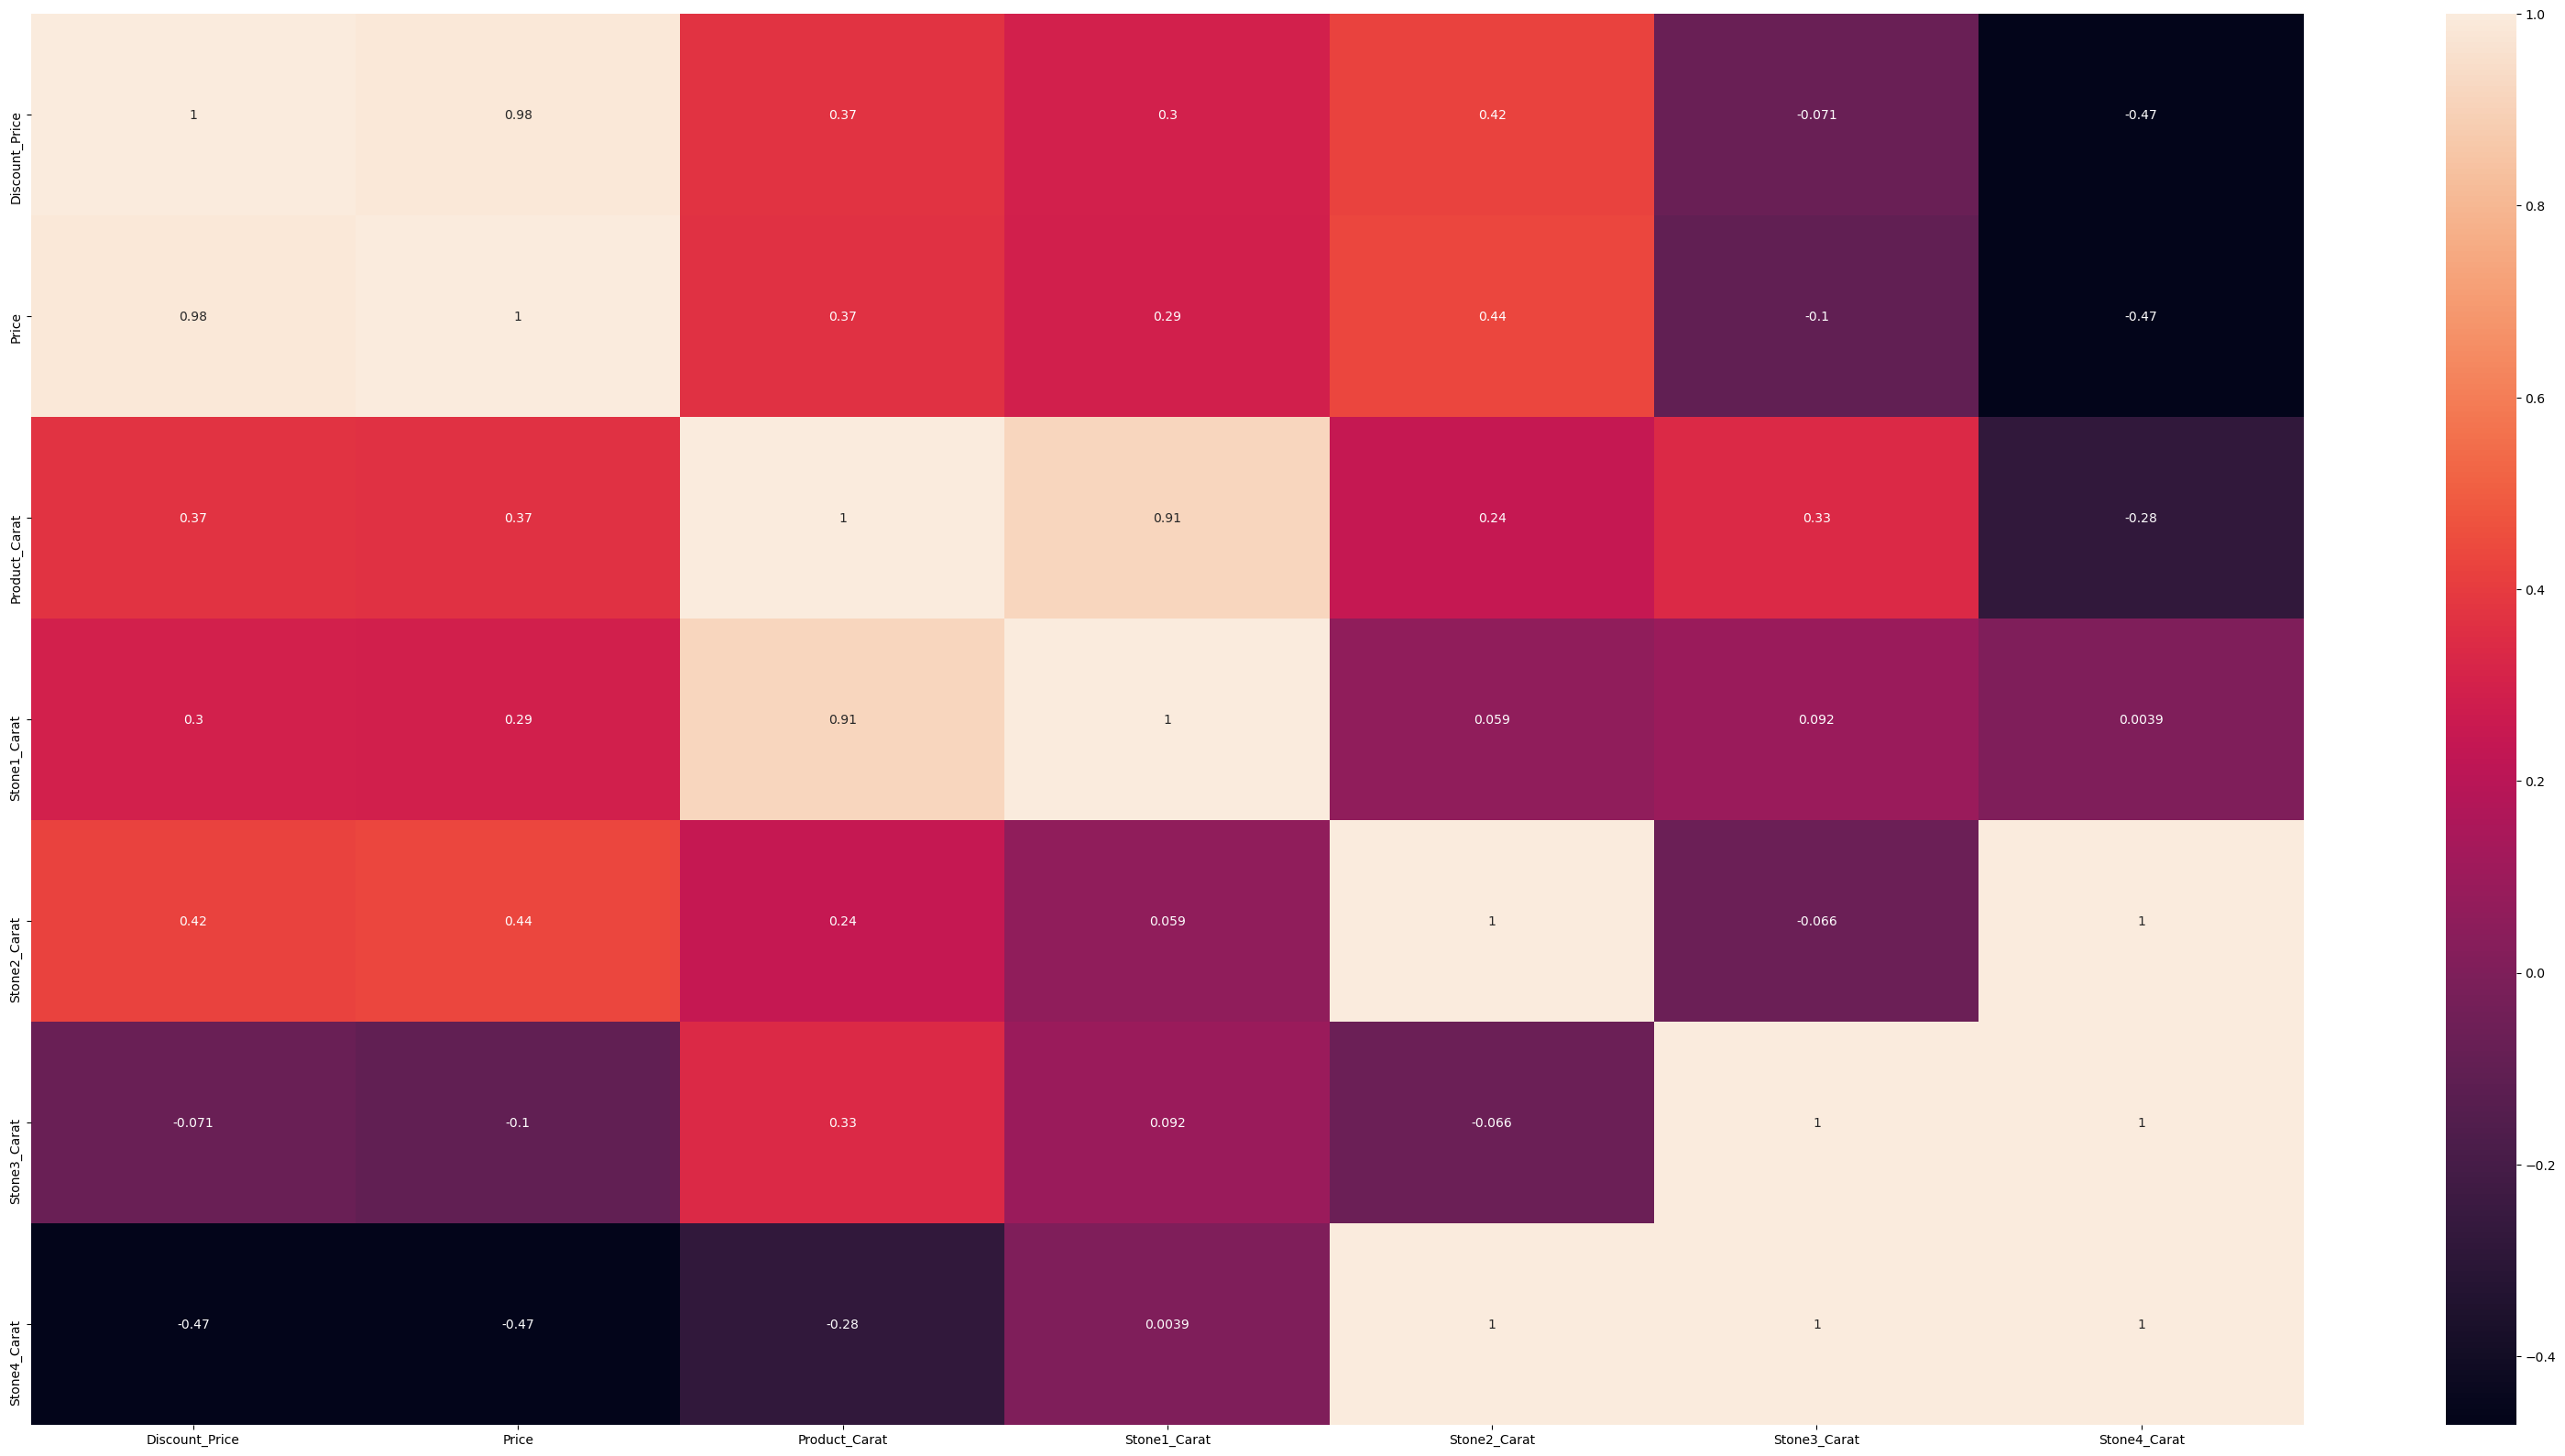

In [12]:
plt.figure(figsize=(40,20))
sns.heatmap(df_rings.corr(), annot=True)
plt.show()

In [15]:
df_rings['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold'], dtype=object)

In [16]:
df_rings['Metal'] = df_rings['Metal'].str.replace('14k Gold','14K Gold')

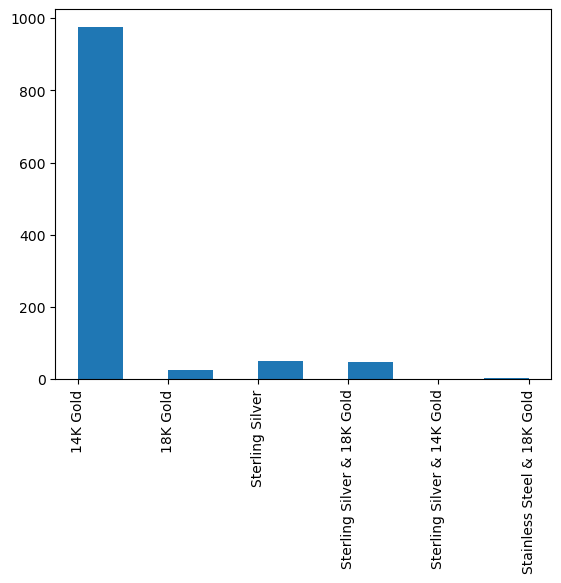

In [17]:
_ = plt.hist(df_rings['Metal'])
plt.xticks(rotation=90)

plt.show()

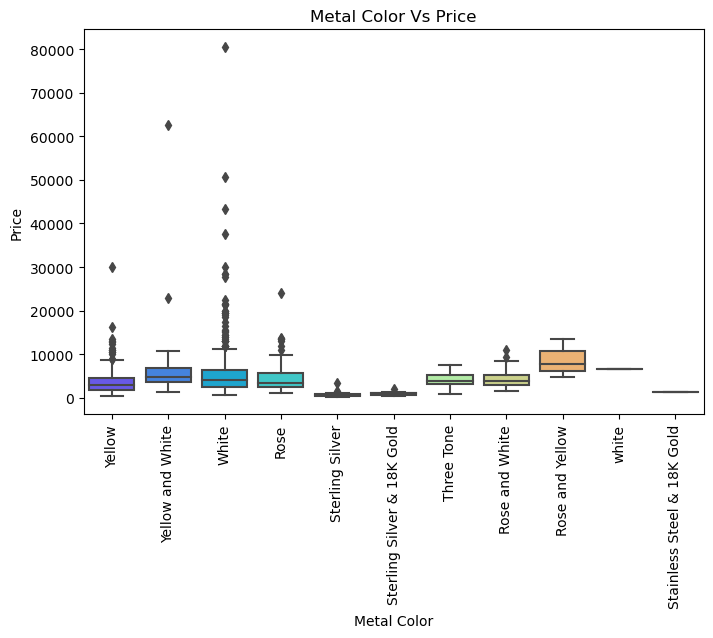

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

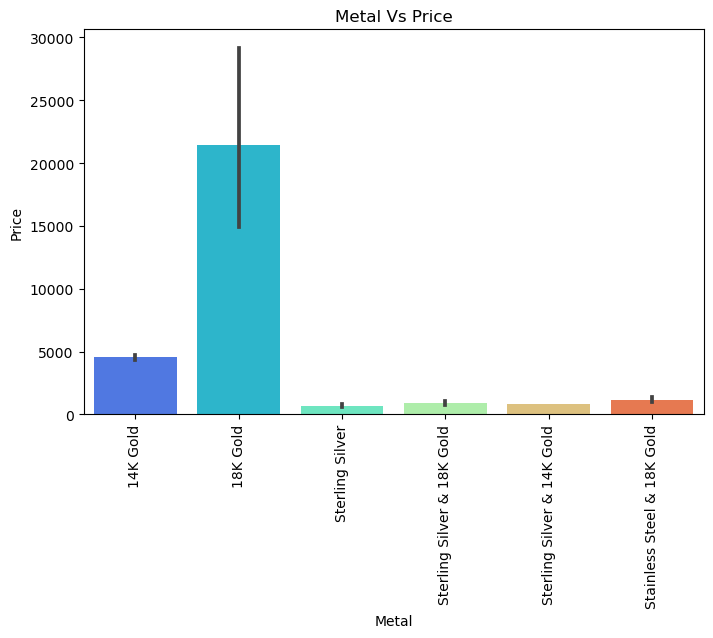

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_rings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

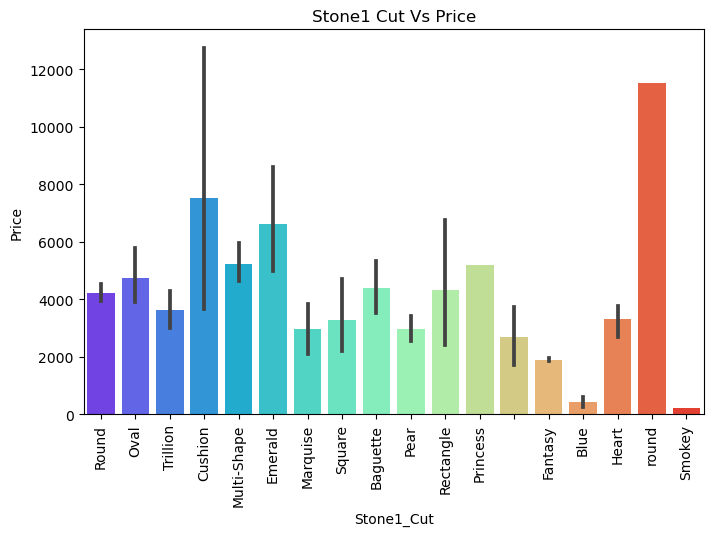

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

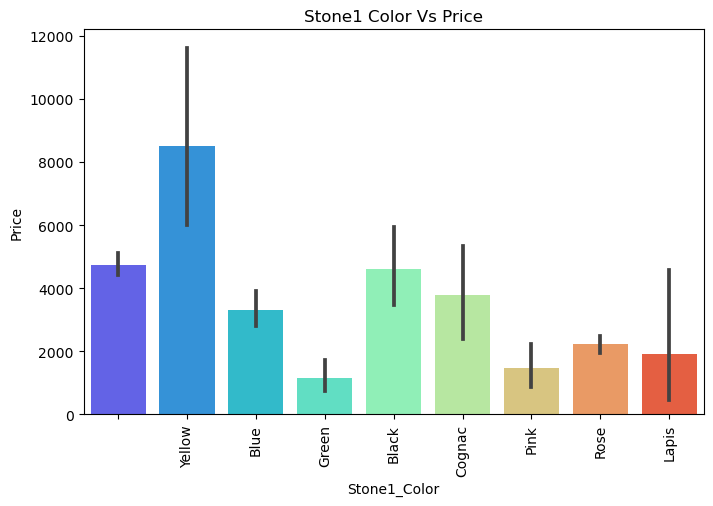

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_rings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

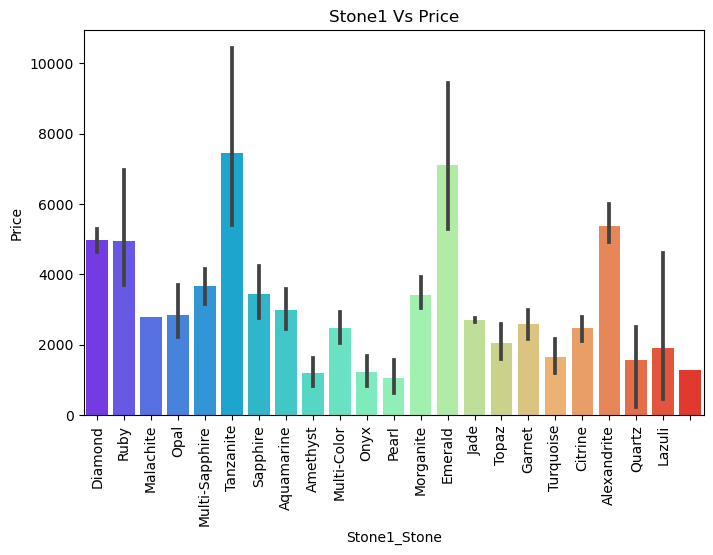

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_rings,palette='rainbow')
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

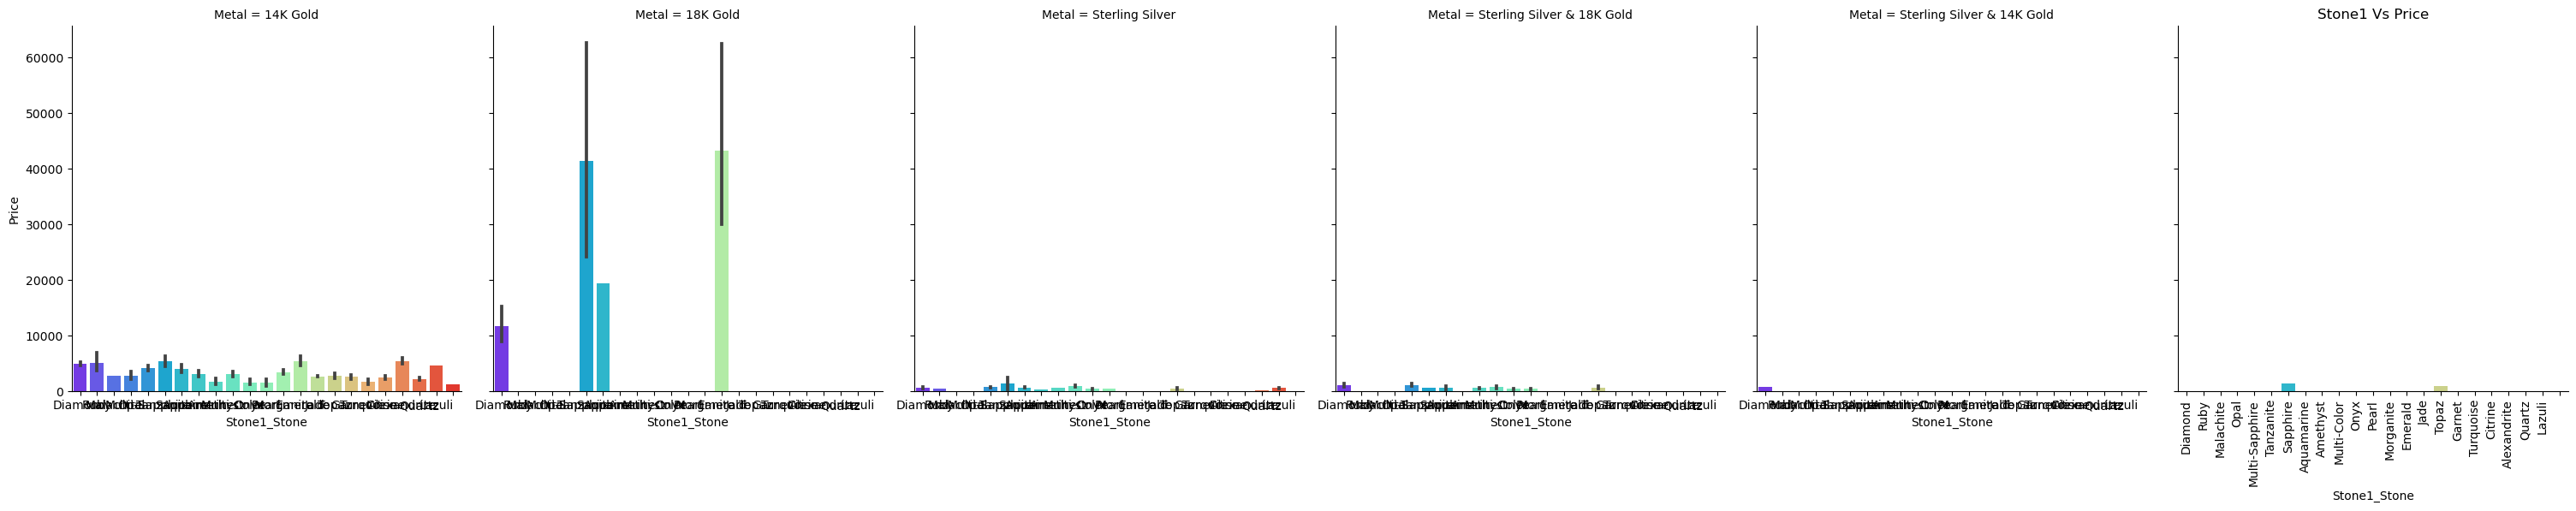

In [49]:
#plt.figure(figsize=(8,5))
sns.catplot(x='Stone1_Stone',y='Price',data=df_rings,col='Metal',palette='rainbow',kind='bar', )
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

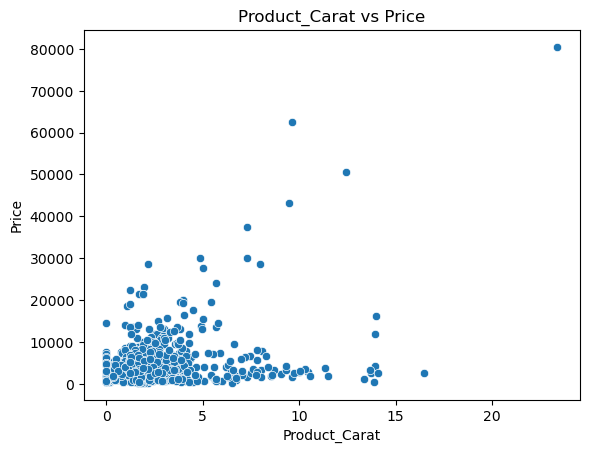

In [86]:
sns.scatterplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

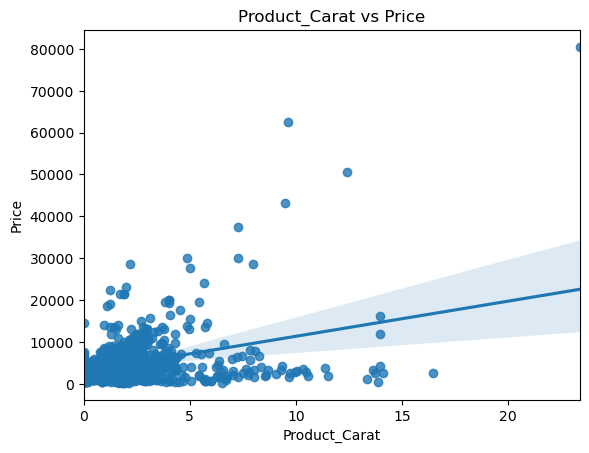

In [87]:
sns.regplot(x='Product_Carat', y='Price',data=df_rings)
_ = plt.title('Product_Carat vs Price')
_ = plt.xlabel('Product_Carat')
_ = plt.ylabel('Price')
plt.show()

In [56]:
# Subsetting our data into our dependent and independent variables.
X = df_rings[["Product_Carat"]]
y = df_rings[["Price"]]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [61]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(828, 1) (828, 1)
(276, 1) (276, 1)


## Making a Linear Regression model: our first model


In [62]:
#Create the Model
rModel = linear_model.LinearRegression(normalize=True)

In [65]:
#TRain The Model on test data
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [66]:
#Evaluate the model
print(rModel.score(X_train, y_train))

0.1637280560186033


The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 16% of the variation from the mean. 

In [67]:
#Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

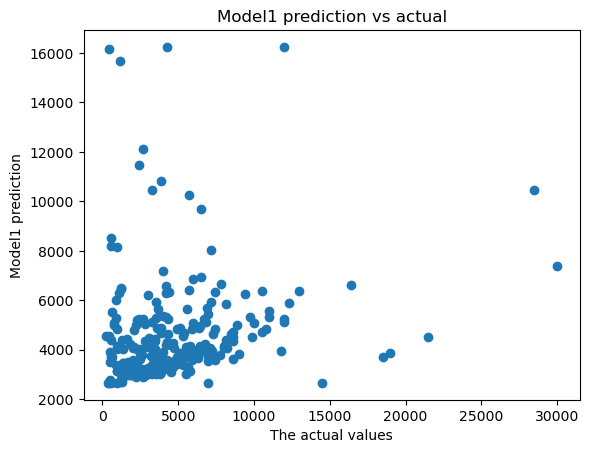

In [83]:
#Plot Predictions against the actual result.
plt.scatter(y_test, y_pred)
plt.title("Model1 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model1 prediction")

plt.show()

## Making a Linear Regression model: our second model: Ordinary Least Squares (OLS)

In [73]:
X = df_rings[['Product_Carat']]
X = sm.add_constant(X)

y= df_rings[['Price']]

In [74]:
#Split the data using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=123)

In [75]:
#Create the model
rModel2 = sm.OLS(y_train, X_train)

#Fit the model with fit()
rModel2_results = rModel2.fit()

In [76]:
#Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     161.7
Date:                Sun, 18 Jul 2021   Prob (F-statistic):           5.80e-34
Time:                        17:28:18   Log-Likelihood:                -8228.1
No. Observations:                 828   AIC:                         1.646e+04
Df Residuals:                     826   BIC:                         1.647e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2660.3365    232.150     11.460      0.000    2204.663    3116.009
Product_Carat   973.8121     76.577     12.717      0.000     823.504    1124.120
==============================================================================
Omnibus:                      796.976   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49173.979
Skew:                           4.229   Prob(JB):                         0.00
Kurtosis:                      39.794   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Use new model to make predictions 
y_pred = rModel2_results.predict(X_test)

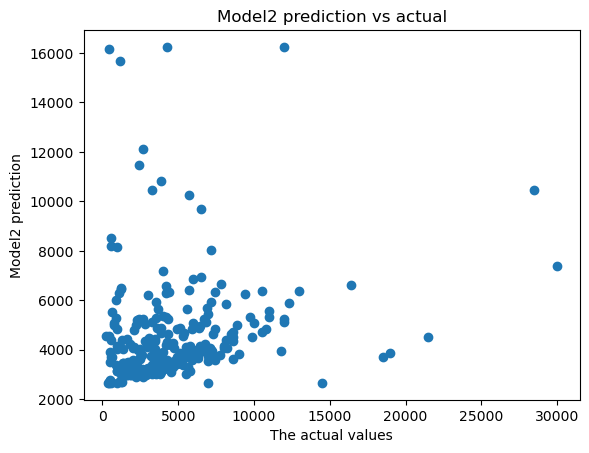

In [82]:
_ = plt.scatter(y_test, y_pred)
plt.title("Model2 prediction vs actual")
plt.xlabel("The actual values")
plt.ylabel("Model2 prediction")

plt.show()

## Conclusion:

Both the models predict 16% variation
